# Laboratory session 2

 Capettini Hilario (Matricola N. 2013031)

## Exercise 1

- a set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2 )


- Evaluate the expected values, $E[X]$, and the variance, $Var(X)$, for both methods

In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

measure <- data.frame(x,p1,p2)
measure


x,p1,p2
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


In [3]:
e_method_1 = sum((measure %>% rowwise() %>% mutate(prod(c(x, p1))))[,4])
v_method_1 = sum((measure %>% rowwise() %>% mutate(m = prod(c(x, x))) %>%
                  rowwise() %>% mutate(prod(c(p1,m))))[,5])-e_method_1**2

e_method_2 = sum((measure %>% rowwise() %>% mutate(m = prod(c(x, p2))))[,4])
v_method_2 = sum((measure %>% rowwise() %>% mutate(m = prod(c(x, x))) %>% 
                  rowwise() %>% mutate(prod(c(p2,m))))[,5])-e_method_2**2


In [4]:
print(paste("Expected value:",sprintf("%.3f",e_method_1),
            "and variance",sprintf("%.3f",v_method_1),"for method 1"))

print(paste("Expected value:",sprintf("%.3f",e_method_2),"and variance",
            sprintf("%.3f",v_method_2),"for method 2"))


[1] "Expected value: 15.959 and variance 0.034 for method 1"
[1] "Expected value: 15.962 and variance 0.028 for method 2"


## Exercise 2

-  the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30


###  simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram.


In [5]:
library(showtext)
showtext_auto()

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }


Loading required package: sysfonts
Loading required package: showtextdb


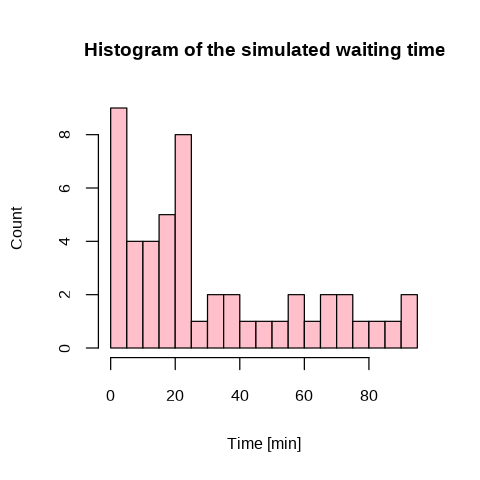

In [6]:
set_plot_dimensions(4, 4)

set.seed(500)    
people <- 50
rate   <- 1/30

t_sim <- rexp(people, rate = rate)
   
# Plot exp density  
hist(t_sim, breaks = 15,
     col = c("pink"),
     main = "Histogram of the simulated waiting time",
     ylab = "Count", xlab ="Time [min]")


###  what is the probability that a person will wait for less than 10 minutes ?

As we are dealing with the exponential distribution, modeling a Poisson process (stationary and possesses independent increments).

$X$ is the waiting time in minutes and $X$ is exponential with $\lambda =1/30$, so the probability that a person will wait for less than a minute is

$$P(X<10) =F(10)$$
Where $F$ is the cumulative distribution

[1] "The probability that a person will wait for less than 10 minutes is 28.35 %."


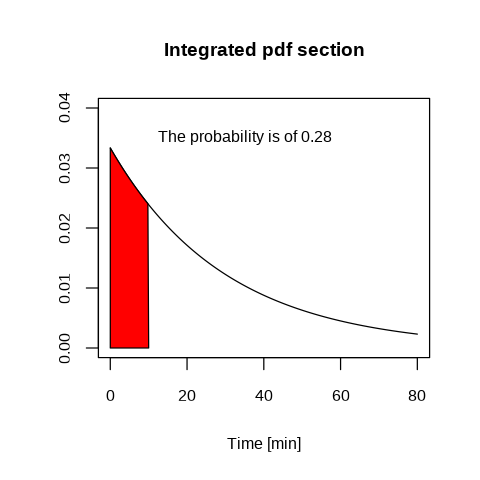

In [7]:
prob <- pexp(10,1/30)
x <- seq(0, 80, by = 0.2)                                     
y <- dexp(x, rate = 1/30)
  
# Plot values                  
plot(x,y,type="l",
     xlim =c(0.1,80),
     ylim  =c(0,0.04),
     xlab ="Time [min]",
     ylab ="",
     main ='Integrated pdf section',)
polygon(c(0,x[x<10],10),c(0,y[x<10],0),col="red",angle=10)
text(35, 0.035, paste("The probability is of",sprintf("%.2f",prob)) )

print(paste("The probability that a person will wait for less than 10 minutes is",sprintf("%.2f",prob*100),"%."))


### Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)



In [8]:
t_avg <- mean(t_sim)
print(paste("The average waiting time from the simulated data is",sprintf("%.2f",t_avg),"minutes."))


[1] "The average waiting time from the simulated data is 31.10 minutes."


$$\begin{equation}
  E(X) = \int_{0}^{\infty} x \lambda e^{-\lambda x} \,dx = \frac{1}{\lambda}     
\end{equation}$$

In [9]:
t_exp <- 30.
print(paste("The expected waiting time is",sprintf("%.2f",t_exp),"minutes."))


[1] "The expected waiting time is 30.00 minutes."


### what is the probability for waiting more than one hour before being received ?

In [10]:
prob_2 <- (1- pexp(60,1/30))*100
print(paste("The probability of waiting more than one hour before being received  is",sprintf("%.2f",prob_2),"%."))


[1] "The probability of waiting more than one hour before being received  is 13.53 %."


## Exercise 3

- let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book


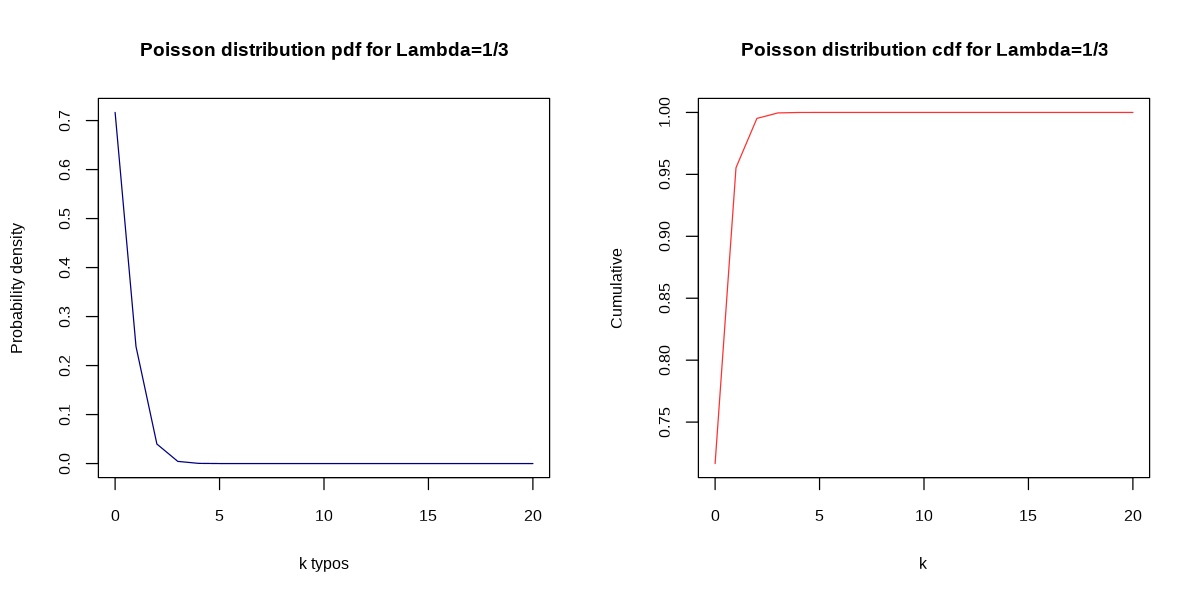

In [11]:
rate <- 1/3
x <- seq(0, 20)                                     
pdf <- dpois(x, lambda = rate)
cdf <- ppois(x, lambda = rate)

set_plot_dimensions(10, 5)
par(mfrow=c(1,2))                  

plot(x,pdf,type="l",
     main = "Poisson distribution pdf for Lambda=1/3",
     col = "navy",
     xlab ="k typos",
     ylab ="Probability density",)

plot(x,cdf,type="l",
     main = "Poisson distribution cdf for Lambda=1/3",
     col = "firebrick1",
     xlab ="k",
     ylab ="Cumulative",)


The probability that there is at least one error on a specific page of the book is $P(X\geqslant 1) = 1-P(X=0)$ 

In [12]:
p <- 1-dpois(0, lambda = rate)
p <- p *100
print(paste("The probability that there is at least one error on a specific page of the book is ",
            sprintf("%.1f",p),"%"))


[1] "The probability that there is at least one error on a specific page of the book is  28.3 %"


## Exercise 4

- we randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.


This problem can be solved using the geometric distribution, given that we are interested in the number of trials to get the first success. We can do it because the phenomenon can be modeled as independent trials, there are only two possible outcomes and the probability of success is the same for each trial (4/52).


In [13]:
p     <- 4/52
trial <- 10
ap <- dgeom(trial,p)*100

print(paste("The probability that at least 10 draws are needed is ",
            sprintf("%.1f",ap),"%"))


[1] "The probability that at least 10 draws are needed is  3.5 %"


## Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

$$ \begin{equation}
  f(X) =
    \begin{cases}
       c(t-1)(2-t) \hspace{1cm} 1<t<2\\
       0 \hspace{3.5cm}\text{otherwise}
    \end{cases}       
\end{equation} $$

where t is the time in hours.



### using the integrate() R function, determine the constant c (and verify it analytically)



In [14]:
#install.packages('GoFKernel') used for the inverse function
library(GoFKernel)


Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


In [15]:
#We define the pdf function
dex.5 <- function(t,c=1) {
    dex5 <- ifelse(t >1 & t<2,
                   c*(t-1)*(2-t),
                   0)
    return(dex5)} 


In [16]:
a <-integrate(dex.5, 0, 3, c = 1)
c <- 1/as.numeric(a["value"])
print(paste("In order to have a normalized pdf c must be equal to",sprintf("%.1f",c)))


[1] "In order to have a normalized pdf c must be equal to 6.0"


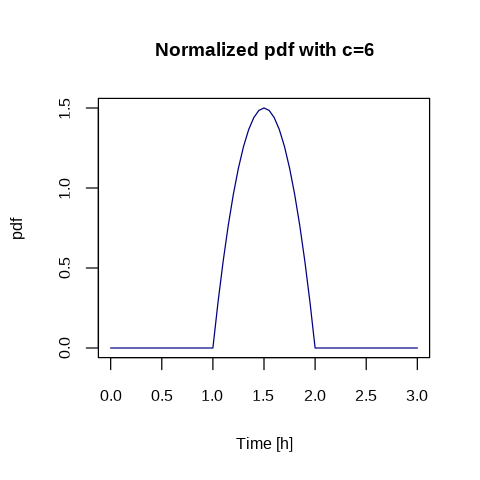

In [17]:
t   <- seq(0, 3,0.05)                                     
y <- dex.5(t,c=c)

set_plot_dimensions(4, 4)
plot(t,y,type="l",
     main = "Normalized pdf with c=6",
     col = "navy",
     xlab ="Time [h]",
     ylab ="pdf",)


### write the set of four R functions and plot the pdf and cdf, respectively


$$ \begin{equation}
  pdf(X) =
    \begin{cases}
       c(t-1)(2-t) \hspace{1cm} 1<t<2\\
       0 \hspace{3.5cm}\text{otherwise}
    \end{cases}       
\end{equation} $$


$$ \begin{equation}
  cdf(X) =
    \begin{cases}
       0           \hspace{3cm}x < 1\\
       x(-\frac{x^2}{3}+\frac{3}{2}x-2) \hspace{1cm} 1<x<2\\
       1           \hspace{3cm}x > 2 
    \end{cases}       
\end{equation} $$

In [18]:
#cdf
pex.5 <- function(x,c=6) {
     pex5 <- ifelse(x<1,
                    0,
                    ifelse(x<2,
                           c*(x*(-x**2/3 +3*x/2 -2)+5/6),
                           1))
     return(pex5)
      } 


The other two functions are the quantile and the sampling function, those cannot be obtained analytically so I will use the r function inverse(f, lower = -Inf, upper = Inf) to obtain the quantile and use it to sample the elements in a sampler function.

In [19]:
qex.5 <- function() {
    qex5 <- inverse(pex.5,lower=1.,upper=2.)
    return(qex5)
    }

rex.5  <- function(n){
    a <-as.vector(runif(n))
    rex5 =c()
    for (i in a){
        rex5 <-  c(rex5,qex.5(i))  
        }
    return(rex5)}


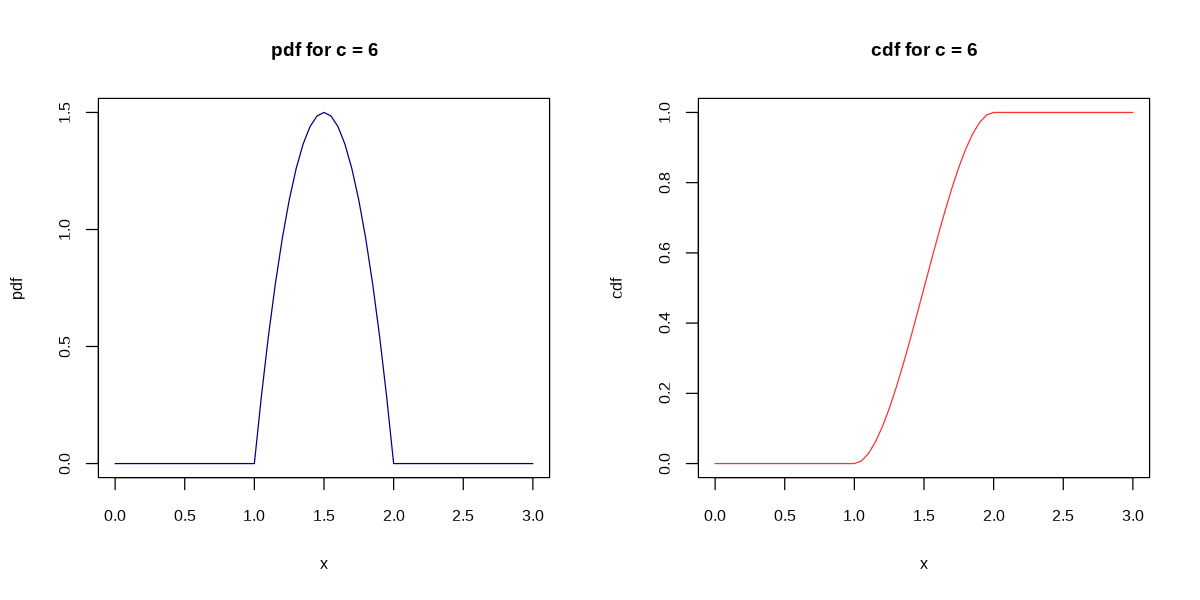

In [20]:
x <- seq(0, 3,0.05)                                     
pdf_ <- dex.5(x, c = 6)
cdf_ <- pex.5(x, c = 6)

set_plot_dimensions(10, 5)
par(mfrow=c(1,2))                  

plot(x,pdf_,type="l",
     main = "pdf for c = 6",
     col = "navy",
     xlab ="x",
     ylab ="pdf",)

plot(x,cdf_,type="l",
     main = "cdf for c = 6",
     col = "firebrick1",
     xlab ="x",
     ylab ="cdf",)


### evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.

In [21]:
a <- as.numeric(integrate(dex.5, 1.25, Inf, c = 6)["value"]) * 100 #1.25 h is equivalent to 75 minutes P(x<5/4) = F(5/4)
b <- as.numeric(integrate(dex.5, 1.5, 2, c = 6)["value"])    * 100 #1.5 h is equivalent to 90 minutes P(3/2 <x<2)= F(2)-F(3/2)

print(paste("The probability that the student will finish the aptitude test in more than 75 minutes is",sprintf("%.2f",a),"%"))
print(paste("The probability that the student will finish the aptitude test in between 90 and 120 minutes is",sprintf("%.2f",b),"%"))


[1] "The probability that the student will finish the aptitude test in more than 75 minutes is 84.37 %"
[1] "The probability that the student will finish the aptitude test in between 90 and 120 minutes is 50.00 %"


## Exercise 6

- the lifetime of tires sold by an used tires shop is $10^4 . x$ km, where $x$ is a random variable following the distribution function
$$ \begin{equation}
  f(X) =
    \begin{cases}
       \frac{2}{x^2} \hspace{1cm} 1<x<2\\
       0 \hspace{1.5cm}\text{otherwise}
    \end{cases}       
\end{equation} $$



###  write the set of four R functions and plot the pdf and cdf, respectively


In [22]:
dex.6 <- function(t) {
     dex6 <- ifelse(t >1 & t<2,
                    2/t**2,
                    0)
    return(dex6)} 

pex.6 <- function(x) {
     pex6 <- ifelse(x<1,
                    0,
                    ifelse(x<2,
                           2 * (1-1/x),
                           1))
      return(pex6)} 

qex.6 <- function(x){
    qex6 <- -2/(x-2)
    return(qex6)
}

rex.6 <- function(n){
    a <-as.vector(runif(n))
    rex6 <- qex.6(a)
    return(rex6)
}


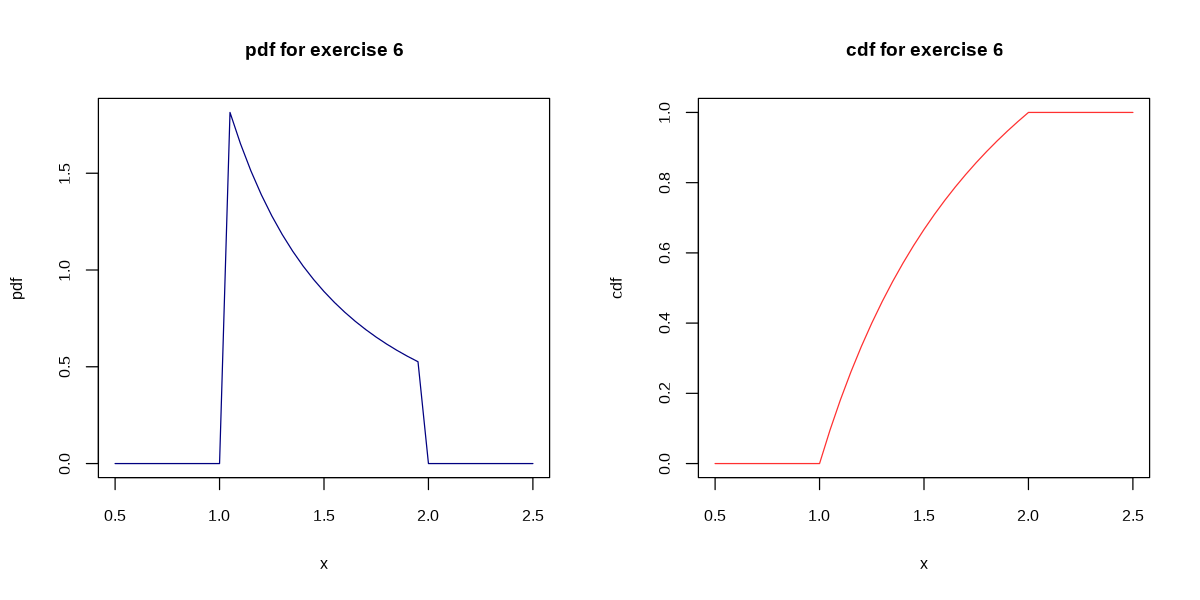

In [23]:
x <- seq(0.5, 2.5,0.05)                                     
pdf_ <- dex.6(x)
cdf_ <- pex.6(x)

set_plot_dimensions(10, 5)
par(mfrow=c(1,2))                  

plot(x,pdf_,type="l",
     main = "pdf for exercise 6",
     col = "navy",
     xlab ="x",
     ylab ="pdf",)

plot(x,cdf_,type="l",
     main = "cdf for exercise 6",
     col = "firebrick1",
     xlab ="x",
     ylab ="cdf",)


### determine the probability that tires will last less than 15000 km


In [24]:
a <- pex.6(1.5)  * 100

print(paste("The probability that tires will last less than 15000 km is",sprintf("%.2f",a),"%"))


[1] "The probability that tires will last less than 15000 km is 66.67 %"


### sample $3000$ random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] − E[X]^2$

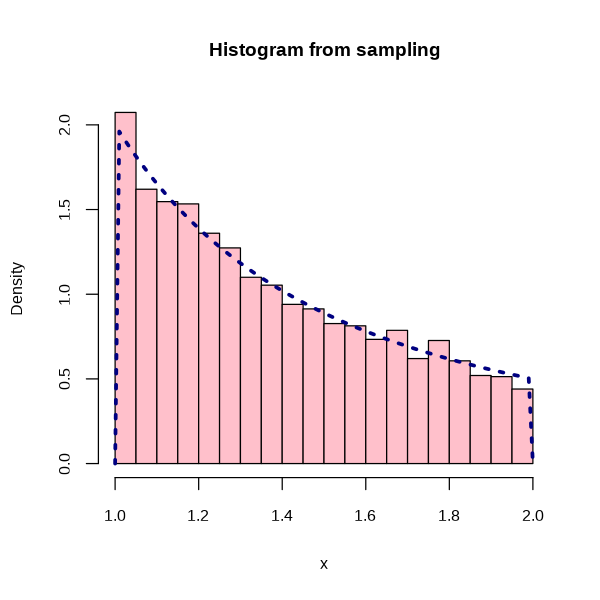

In [25]:
samples <- rex.6(3000)
probabilities <- dex.6(samples)

set_plot_dimensions(5, 5)
hist(samples , breaks=25, freq=FALSE ,
     col="pink", xlab="x",
     main="Histogram from sampling")

curve(dex.6, col="navy", lt=3, lw=3, add=TRUE)


In [26]:
ex  <- integrate(function(x) x * dex.6(x),lower = -Inf,upper = Inf)$value
ex2 <-integrate(function(x) x**2 * dex.6(x),lower = -Inf,upper = Inf)$value
                
var <- ex2 -ex**2

print(paste("The mean value is",sprintf("%.2f",ex)))
print(paste("The variance is",sprintf("%.4f",var)))
                

[1] "The mean value is 1.39"
[1] "The variance is 0.0782"
